<a href="https://colab.research.google.com/github/saloni1901/Data_science_projects/blob/master/Regression_models_evaluation_on_power_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [189]:
df=pd.read_csv('Data.csv')
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [190]:
df.shape

(9568, 5)

In [191]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [193]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [194]:
def my_plotter(data1, data2,param_dict):
   out = sns.regplot(data1, data2, **param_dict)
   return out

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


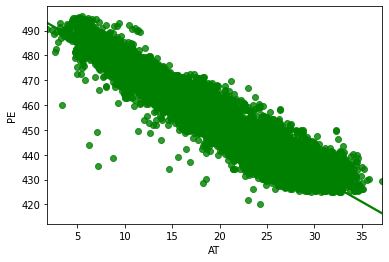

In [195]:
my_plotter(df['AT'],df['PE'],{'color':'g'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


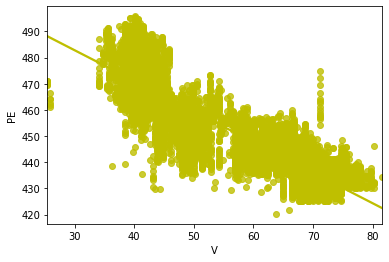

In [196]:
my_plotter(df['V'],df['PE'],{'color':'y'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


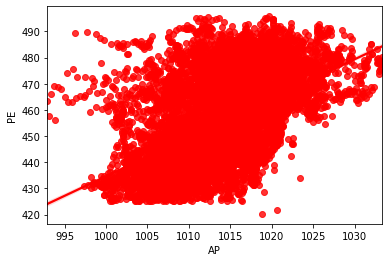

In [197]:
my_plotter(df['AP'],df['PE'],{'color':'r'})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


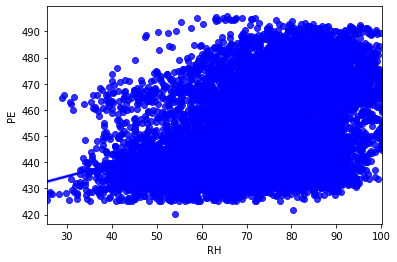

In [198]:
my_plotter(df['RH'],df['PE'],{'color':'b'})

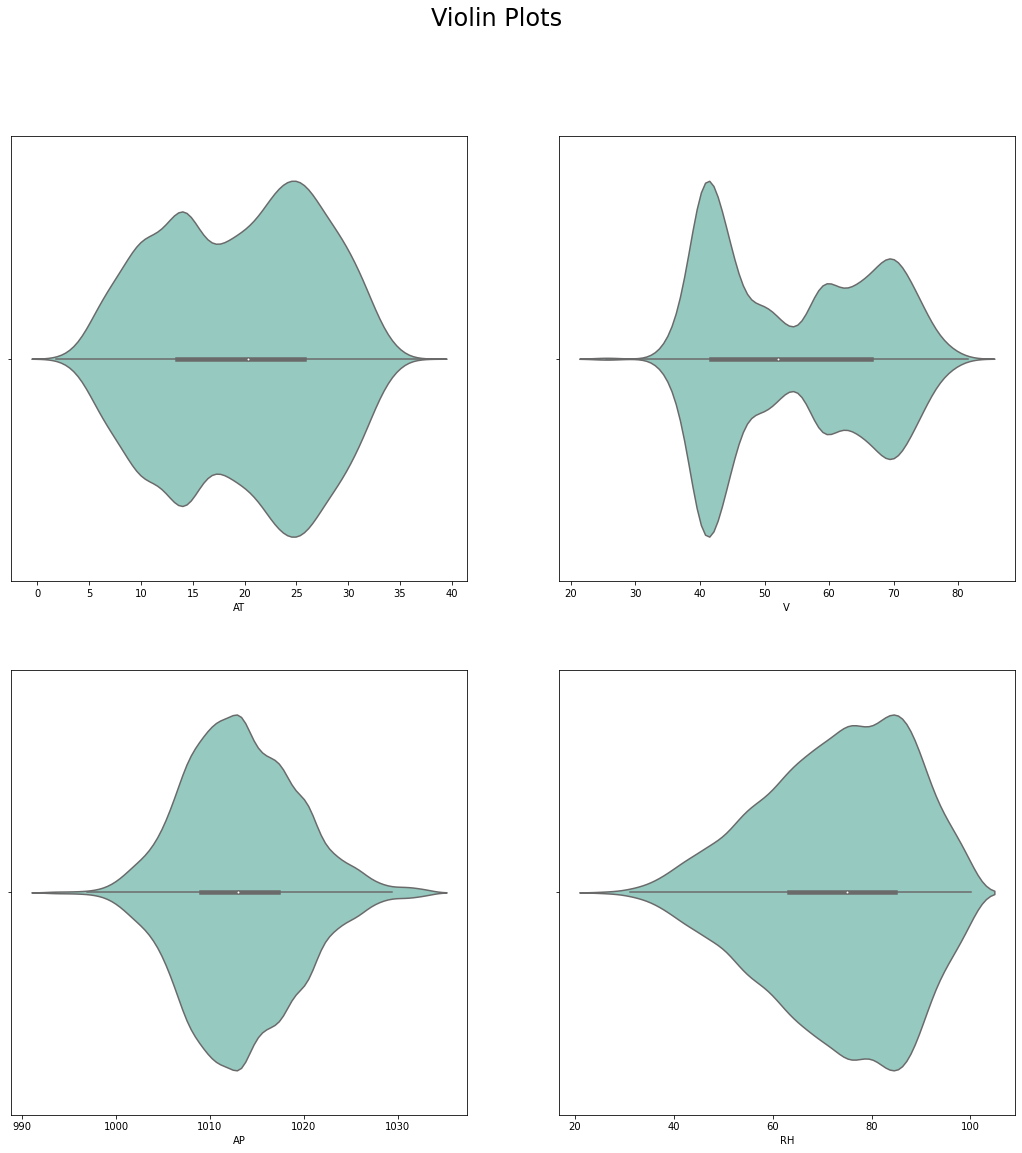

In [199]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="AT", data=df,ax=ax[0,0],palette='Set3')
sns.violinplot(x="V", data=df,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='AP', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='RH', data=df, ax=ax[1,1],palette='Set3')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

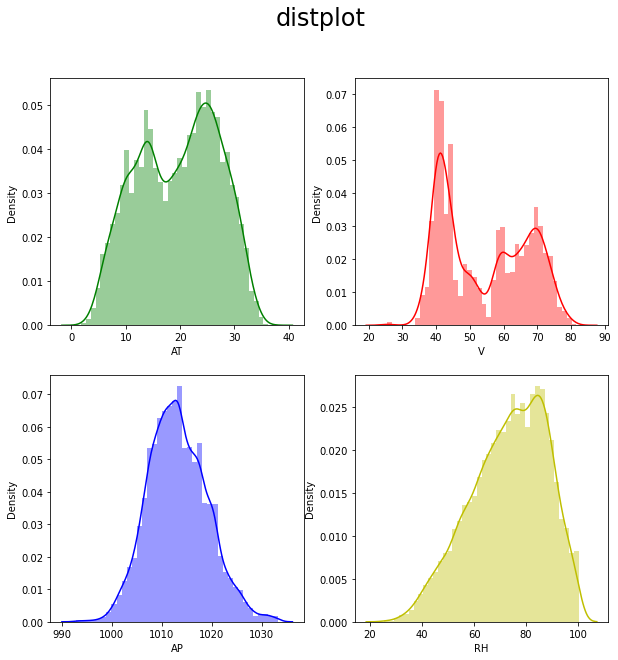

In [200]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.suptitle('distplot',fontsize=24)
sns.distplot(df["AT"],ax=ax[0,0],bins=40,color='g')
sns.distplot(df["V"],ax=ax[0,1],bins=40,color='r')
sns.distplot(df["AP"],ax=ax[1,0],bins=40,color='b')
sns.distplot(df['RH'],ax=ax[1,1],bins=40,color='y')

In [201]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score,mean_squared_error,mean_absolute_error
model1=LinearRegression()
model1.fit(X_train,y_train)
y1=model1.predict(X_test)
model1.score(X_train,y_train)

0.9275275251774738

In [204]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(X_train)
model2=LinearRegression()
model2.fit(x_poly,y_train)
y2=model2.predict(poly.transform(X_test))
model2.score(x_poly,y_train)

0.9412056964097598

In [206]:
from sklearn.preprocessing import StandardScaler
s_x=StandardScaler()
s_y=StandardScaler()
X_traint=s_x.fit_transform(X_train)
y_traint=s_y.fit_transform(y_train.reshape(len(y_train),1))
model3=SVR(kernel='rbf')
model3.fit(X_traint,y_traint)
model3.score(X_traint,y_traint)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9444981947044367

In [207]:
y3=s_y.inverse_transform(model3.predict(s_x.transform(X_test)))


In [216]:
model4=DecisionTreeRegressor(random_state=0)
model4.fit(X_train,y_train)
y4=model4.predict(X_test)
model4.score(X_train,y_train)

1.0

In [209]:
model5=RandomForestRegressor(n_estimators=10,random_state=0)
model5.fit(X_train,y_train)
y5=model5.predict(X_test)
model5.score(X_train,y_train)

0.9915762914574955

In [211]:
print("LR_r2:{}".format(r2_score(y_test,y1)))
print('LR_mse:{}'.format(mean_squared_error(y_test,y1)))
print('LR_mae:{}'.format(mean_absolute_error(y_test,y1)))

LR_r2:0.9310173107097915
LR_mse:20.114356686448268
LR_mae:3.578305244017114


In [212]:
print("PR_r2:{}".format(r2_score(y_test,y2)))
print('PR_mse:{}'.format(mean_squared_error(y_test,y2)))
print('PR_mae:{}'.format(mean_absolute_error(y_test,y2)))

PR_r2:0.9452588792955396
PR_mse:15.96172081133584
PR_mae:3.1397882407386777


In [213]:
print("svR_r2:{}".format(r2_score(y_test,y3)))
print('svrR_mse:{}'.format(mean_squared_error(y_test,y3)))
print('svrR_mae:{}'.format(mean_absolute_error(y_test,y3)))

svR_r2:0.9473852686397196
svrR_mse:15.34169636515683
svrR_mae:3.0144106309233174


In [214]:
print("Dt_r2:{}".format(r2_score(y_test,y4)))
print('DT_mse:{}'.format(mean_squared_error(y_test,y4)))
print('DT_mae:{}'.format(mean_absolute_error(y_test,y4)))

Dt_r2:0.916799565387291
DT_mse:24.260046041798606
DT_mae:3.296637112096264


In [215]:
print("RF_r2:{}".format(r2_score(y_test,y5)))
print('RF_mse:{}'.format(mean_squared_error(y_test,y5)))
print('RF_mae:{}'.format(mean_absolute_error(y_test,y5)))

RF_r2:0.9581488391784074
RF_mse:12.203194528499049
RF_mae:2.5487457251424948


In [ ]:
BEST on basis of r2_score:
1.randomforest
2.svr
